# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  30 баллов
* Задача 2 &mdash;  30 баллов






-----

In [96]:
# Bot check

# HW_ID: phds_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [79]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

### Задача 1


В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём следующие датасеты:

**Профиль физика:** https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi. Будем предсказывать длительность солнечных вспышек. Используйте файл с данными до 2018 года.


*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

#### Загрузка и предобработка данных:

**Физика:**

In [2]:
data = pd.read_csv('hessi.solar.flare.UP_To_2018.csv')

In [3]:
data.columns

Index(['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s',
       'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec',
       'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4',
       'flag.5'],
      dtype='object')

Уберем категориальные признаки, а также дату и время начала и время конца вспышки:

In [4]:
data = data.drop(['peak','flare', 'start.date', 'start.time', 'end', 'flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5'], axis=1)

Момент пика тоже стоит убрать. А вот с энергией стоит повозиться:

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data = data.copy()
data['energy.kev'] = labelencoder.fit_transform(data['energy.kev'].values)
data[:10]

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar
0,712,136,167304.0,1,592,-358,692,0
1,288,7,9504.0,6,604,-341,694,9811
2,216,15,11448.0,6,-310,375,487,9825
3,244,20,17400.0,1,-277,378,469,9822
4,236,336,313392.0,2,-272,390,476,9825
5,788,272,524304.0,1,-271,389,474,9825
6,548,28,52488.0,6,-267,390,473,9825
7,708,92,125352.0,2,-362,309,476,0
8,108,26,10368.0,6,-235,390,455,9822
9,232,26,16920.0,1,-905,-375,980,0


In [6]:
labelencoder.classes_

array(['100-300', '12-25', '25-50', '3-6', '300-800', '50-100', '6-12',
       '7000-20000', '800-7000'], dtype=object)

Тут в чатике написали что-то про упорядоченность классов и что мы этого не проходили, но я уже сделал всё дз, так что ничего исправлять не буду:) Стоило изначально проконтролировать, чтобы упорядоченность соответствовала увеличению энергии.

Ещё может момент пика не стоило убирать, раз этого не просили, но это такая информация, которая чисто по смыслу не должна тут быть. Смею предположить, что это в дальнейшем это оказалось бы важным признаком, но я его выкинул)

In [7]:
data.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar'],
      dtype='object')

In [8]:
X = data.drop('duration.s', axis=1)
y = data['duration.s']

Разбейте данные на обучающую выборĸу и на валидацию, выделив на валидацию 25% данных.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию. Для того, чтобы исследовать зависимость от количества деревьев, обучите лес **один** раз и посчитайте предсказания каждого отдельного дерева в лесу. После этого используйте усреднение первых $k$ предсказаний в качестве ответа для $k$ деревьев. 

In [95]:
n_estimators = 100
model = RandomForestRegressor(n_estimators = n_estimators)
model.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
pred = np.zeros(shape = (n_estimators, y_test.shape[0]))
for i in range(n_estimators):
    pred[i] = model[i].predict(X_test)

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegr

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegr

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [82]:
means = pred.cumsum(axis = 0).T/[np.arange(1, n_estimators+1,1)]

In [94]:
errors = np.zeros(100)
for k in range(n_estimators):
    errors[k] = MSE(y_test, means[:,k])

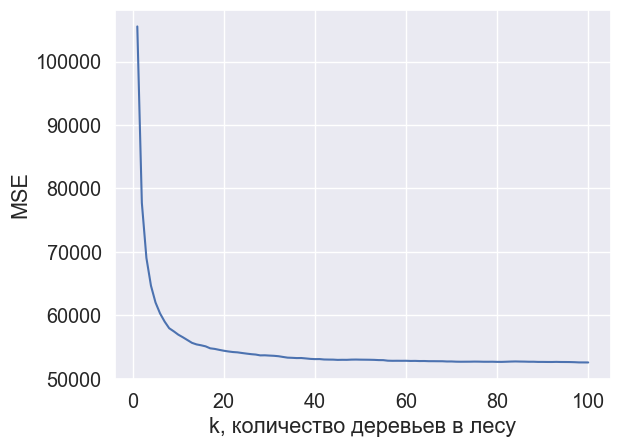

In [97]:
plt.plot(np.arange(1,101,1), errors)
plt.xlabel("k, количество деревьев в лесу")
plt.ylabel("MSE");

In [100]:
n_estimators = 100
max_dep = 25
preds = np.zeros((25, y_test.shape[0]))
for max_depth in np.arange(1,max_dep + 1,1):
    model2 = RandomForestRegressor(n_estimators = n_estimators, max_depth= max_depth)
    model2.fit(X_train,y_train)
    preds[max_depth-1] = model2.predict(X_test)

In [103]:
errors2 = np.zeros(25)
for k in range(25):
    errors2[k] = MSE(y_test, preds[k,:])

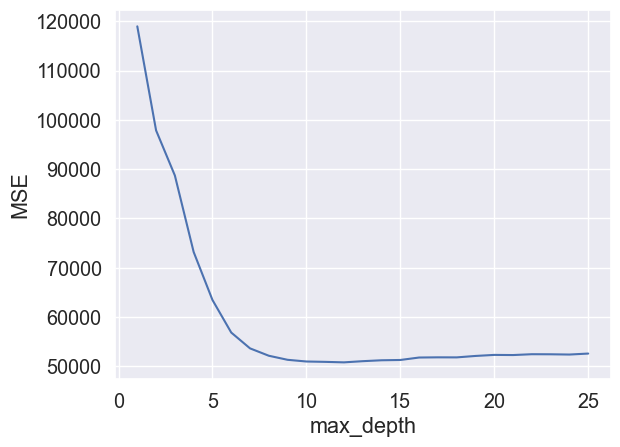

In [104]:
plt.plot(np.arange(1,26,1), errors2)
plt.xlabel("max_depth")
plt.ylabel("MSE");

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 

1) Чем больше деревьев, тем точнее предсказание. Это логично, ведь чем больше сильно отличающихся моделей, тем меньше ошибка. А вот ошибка от глубины начала увеличиваться, что свидетельствует о перебучении на трейн данных

2) Метрика начинает мало изменяться при больших значения параметров

3) Опереться не на что, но я попробую) По графику видно, что в какой-то момент начинается рост ошибки на, что указывает на переобучение. При высокой глубине дерева оно в конечном счёте практически "обводит" трейн данные, в листьях остаются ~1 точки, что ведёт к росту схожести деревьев в лесу и, как следствие, росту ошибки. Этого можно избежать, выставив параметр минимального числа объектов в листе

Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [11]:
for _ in range(3):
    model_ = RandomForestRegressor()
    model_.fit(X_train, y_train)
    print(MSE(y_test, model_.predict(X_test)))

53898.599341563066
54296.20913759537
54057.10399867973


**Ответ:** randon есть random. В каждом лесу 100 случайных деревьев, которые различаются между собой. Как ни крути, получатся 3 разных леса

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [10]:
from sklearn.model_selection import GridSearchCV

In [14]:
estimator=RandomForestRegressor(random_state=42)
param_grid={
      'max_depth': np.arange(1,10,1),
      'n_estimators': np.arange(1,100,1),
  }

tree_gridsearch = GridSearchCV(estimator,param_grid=param_grid)

In [15]:
tree_gridsearch = tree_gridsearch.fit(X_train,y_train)

Выведите найденные оптимальные параметры. Поясните, согласуются ли наблюдения с теорией.

In [16]:
print(tree_gridsearch.best_params_)

{'max_depth': 9, 'n_estimators': 97}


**Вывод** 

максимальная глубина совпала с теорией

А вот количество деревьев по идее должно быть чем больше - тем лучше, ведь в формуле ошибки T в знаменателе. Видимо там отличия не слишком высокие, поэтому случайность леса "97" была удачней, чем больших лесов.

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [17]:
max_depth = 9
n_estimators = 97

Оценим качество предсказаний обученного решающего леса.

In [18]:
print('train MSE {:.4f}'.format(
    MSE(tree_gridsearch.best_estimator_.predict(X_train), y_train)
))
print('test MSE {:.4f}'.format(
    MSE(tree_gridsearch.best_estimator_.predict(X_test), y_test)
))

train MSE 44250.0029
test MSE 53470.1993


Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [22]:
errors_test = []
errors_train= []
for i in np.arange(1,8,1):
    forest = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators, max_features= i)
    forest.fit(X_train, y_train)
    errors_test.append(MSE(y_test, forest.predict(X_test)))
    errors_train.append(MSE(y_train, forest.predict(X_train)))

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

Text(0, 0.5, 'MSE')

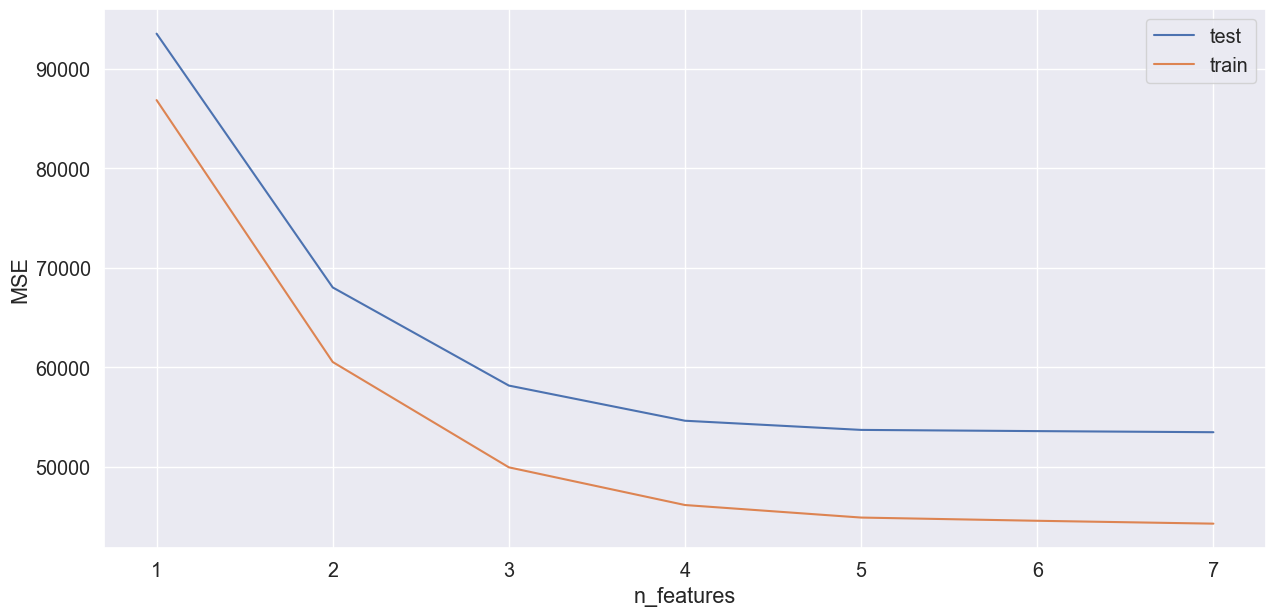

In [23]:
plt.figure(figsize =(15,7))
plt.plot(np.arange(1,8,1), errors_test, label = "test")
plt.plot(np.arange(1,8,1), errors_train, label = "train")
plt.legend()
plt.xlabel("n_features")
plt.ylabel("MSE")

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** 

График получился убывающим, но я думал, что будет какой-то минимум, так как ограничивание количества признаков, по которым идёт разбиение, ведёт к меньшей сколлерированности деревьев, но может я что-то не так понял.

Да и на лекции была формулка d/3 для задачи регрессии, т.е. должно получиться 2. Может всй дело в том, что у нас мало признаков.

Зафиксируйте наилучшие гиперпараметры.

Проведите исследование скорости обучения и предсказания. 

Засеките время обучения и предсказания, например, с помощью модуля `time`.



In [25]:
forest = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators, max_features= 7)

In [26]:
%%time
forest.fit(X_train, y_train)

Wall time: 49.4 s


RandomForestRegressor(max_depth=9, max_features=7, n_estimators=97)

In [27]:
%%time
forest.predict(X_test)

Wall time: 708 ms


array([458.12258709, 335.91479819, 825.36745502, ..., 254.75080397,
       339.90375437, 408.11282682])

Посчитайте среднюю глубину дерева в случайном лесе. Используйте функцию `get_depth()` для отдельных деревьев леса.
Посчитайте среднее количество листьев, используя функцию `get_n_leaves()` для отдельных деревьев.



In [29]:
sum_depth = 0
sum_leaves = 0
for tree in forest:
    sum_depth +=tree.get_depth()
    sum_leaves += tree.get_n_leaves()

In [32]:
print(f"Mean depth = {sum_depth/n_estimators}\nMean number of leaves = { sum_leaves/n_estimators}")

Mean depth = 9.0
Mean number of leaves = 484.5154639175258


Сделайте выводы. Какие деревья обычно используются в случайном лесу? Как вы предполагаете, как от этого зависит скорость обучения и предсказания?

**Ответ** 

глубина оказалась такой же, какой мы её ограничивали

2^8 < 484 < 2^9, окуда можно сделать вывод, что большинство "ответвлений" доходит до максимальной глубины, т.е. нет такого, что на малой глубине деревья уже делают предсказания

Глубокие и разветвленные деревья дольше обучать, скорость предсказания остаётся очень высокой

Исследуйте важности признаков для следующих случаев:



*   Решающее  дерево
*   Случайный лес
*   Лес из первых 5-10 деревьев случайного леса из предыдущего пункта.

Также проанализируйте качество моделей выше.

Сделайте выводы. Отличаются ли посчитанные важности? Есть ли связь важностей признаков и качества моделей? О чем говорят посчитанные важности признаков?



In [34]:
from sklearn.tree import DecisionTreeRegressor

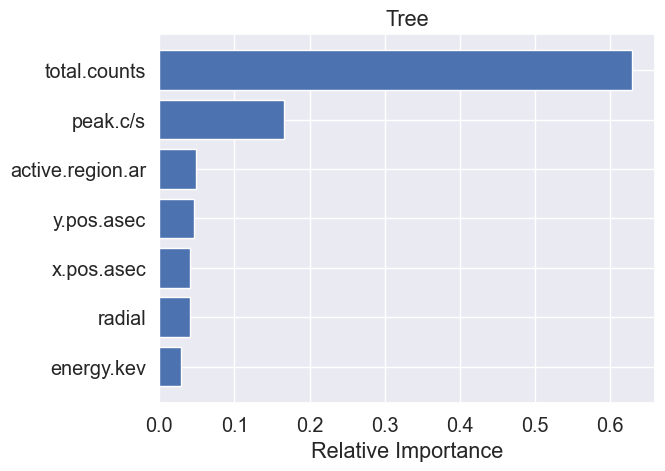

MSE =  103977.94475823115


In [35]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
features = X_train.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

plt.title('Tree')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print("MSE = ", MSE(y_test, tree.predict(X_test)))

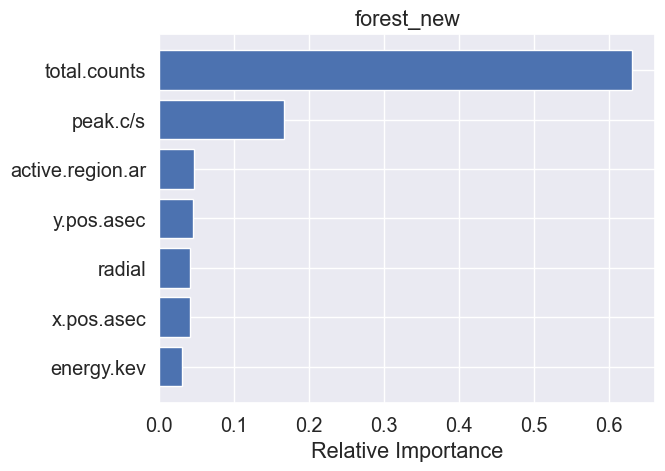

MSE =  54010.17539048126


In [36]:
forest_new = RandomForestRegressor()
forest_new.fit(X_train, y_train)
features = X_train.columns
importances = forest_new.feature_importances_
indices = np.argsort(importances)

plt.title('forest_new')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print("MSE = ", MSE(y_test, forest_new.predict(X_test)))

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegr

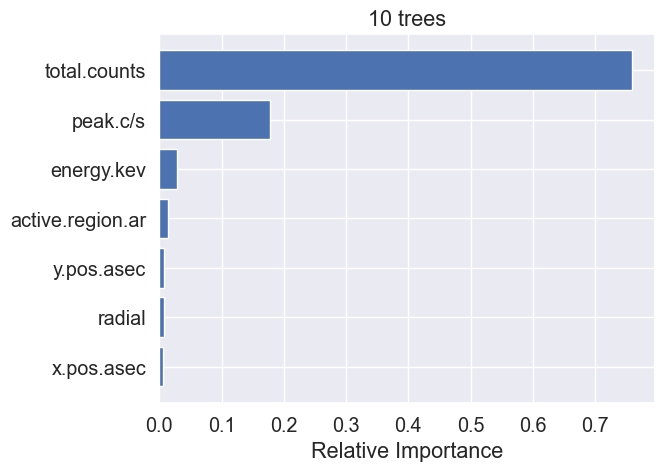

In [47]:
importances = forest[0].feature_importances_
predict = np.zeros(y_test.shape[0])
for tree in forest[1:10]:
    importances += tree.feature_importances_
    predict +=tree.predict(X_test)
features = X_train.columns
indices = np.argsort(importances/10)

plt.title('10 trees')
plt.barh(range(len(indices)), importances[indices]/10)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
print("MSE = ", MSE(y_test, predict/10))

MSE =  58908.64316608095


**Ответ:** 

Топ важных признаков и их относительные важности примерно совпадают. 

Точнать на дереве сильно отличается от точности на лесе и старом лесе, но важности признаков примерно одинаковые, из чего можно сделать вывод о независимости. 

Посчитанные важности говорят, что разбиение по total.counts и peak c/s дают наибольший вклад в уменьшение ошибки

### Задача 2

На лекции была получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите случайный лес и беггинг на моделях ридж-регрессии.


Для реализации данного эксперимента используйте класс беггинг-модели
`sklearn.ensemble.BaggingRegressor` , у которого используйте следующие поля:
* `base_estimator` — базовая модель;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Эти модели можно получить с помощью поля `estimators_` у обученной беггинг-модели. Корреляции моделей можно смотреть как корреляции векторов их предсказаний.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

In [72]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [51]:
regr = BaggingRegressor(base_estimator= DecisionTreeRegressor(), n_estimators = 100, max_features = 7)
regr.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=7,
                 n_estimators=100)

In [52]:
preds = []
for i in range(100):
    preds.append(regr.estimators_[i].predict(X_test))

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegr

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegr

In [53]:
np.corrcoef(preds)

array([[1.        , 0.737154  , 0.73082605, ..., 0.73763961, 0.73819125,
        0.72551304],
       [0.737154  , 1.        , 0.73388232, ..., 0.73575295, 0.73870067,
        0.72697873],
       [0.73082605, 0.73388232, 1.        , ..., 0.72407071, 0.72682358,
        0.72486519],
       ...,
       [0.73763961, 0.73575295, 0.72407071, ..., 1.        , 0.73563485,
        0.72427388],
       [0.73819125, 0.73870067, 0.72682358, ..., 0.73563485, 1.        ,
        0.72745435],
       [0.72551304, 0.72697873, 0.72486519, ..., 0.72427388, 0.72745435,
        1.        ]])

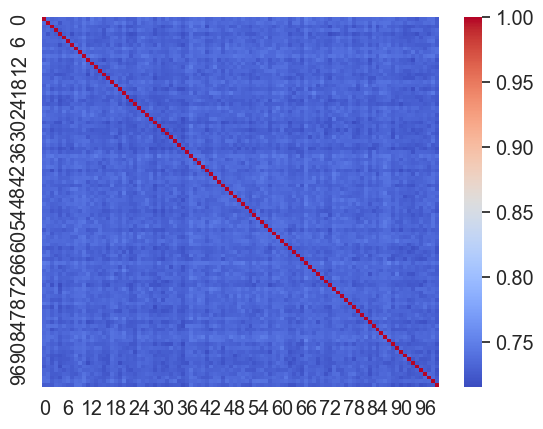

In [55]:
sns.heatmap(np.corrcoef(preds), cmap= 'coolwarm');

In [63]:
varianse_forest = preds[0].var()*(1/100+99/100*np.corrcoef(preds[0:2])[0,1])

In [69]:
print(f"Varianse of forest = {varianse_forest.round(0)}")

Varianse of forest = 141083.0


In [84]:
MSE(y_test, regr.predict(X_test))

54198.581562716485

In [70]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
print(f"Varianse of tree = {tree.predict(X_test).var().round(0)}")

Varianse of tree = 193353.0


In [85]:
MSE(y_test, tree.predict(X_test))

103275.9487532718

Ошибка на ансамбле меньше

---

Теперь на ридж регрессии

In [90]:
regr2 = BaggingRegressor(base_estimator= Ridge(), n_estimators = 100, max_features = 7)
regr2.fit(X_train, y_train)

BaggingRegressor(base_estimator=Ridge(), max_features=7, n_estimators=100)

In [91]:
preds = []
for i in range(100):
    preds.append(regr2.estimators_[i].predict(X_test))

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-pack

C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\AsusPro\anaconda3\lib\site-pack

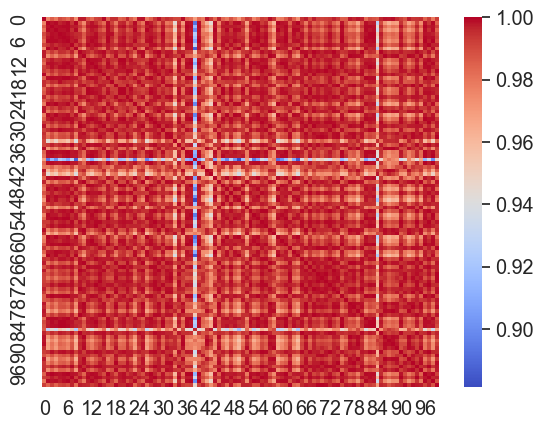

In [92]:
sns.heatmap(np.corrcoef(preds), cmap= 'coolwarm');

In [93]:
varianse_100ridge = preds[0].var()*(1/100+99/100*np.corrcoef(preds[0:2])[0,1])
print(f"Varianse of 100 ridges = {varianse_100ridge.round(0)}")

Varianse of 100 ridges = 26827.0


In [94]:
MSE(y_test, regr2.predict(X_test))

156623.5937941097

In [78]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print(f"Varianse of singre ridge = {ridge.predict(X_test).var().round(0)}")

Varianse of singre ridge = 25038.0


In [87]:
MSE(y_test, ridge.predict(X_test))

157097.42062452552

Видно, что модели в ансамбле очень сильно сколлерированны и предсказания одинакого плохи

**Вывод**

Ансамбль моделей позваляет уменьшить variance ошибку, но необходимо, чтобы модели сильно различались между собой